In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv("deforestation_dataset.csv")
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,Indonesia,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,3,9.426264,238,184,7.005531
1,Brazil,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,4,2.602618,418,78,20.044415
2,Russia,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,2,51.917315,186,49,22.747603
3,Australia,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,4,23.716328,190,2,22.701362
4,Australia,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,4,21.424037,159,41,18.085869


In [3]:
df.isnull().sum()

Country                            0
Year                               0
Forest_Loss_Area_km2               0
Tree_Cover_Loss_percent            0
CO2_Emission_mt                    0
Rainfall_mm                        0
Population                         0
GDP_Billion_USD                    0
Agriculture_Land_Percent           0
Deforestation_Policy_Strictness    0
Corruption_Index                   0
International_Aid_Million_USD      0
Illegal_Lumbering_Incidents        0
Protected_Areas_Percent            0
dtype: int64

In [4]:
le1=LabelEncoder()
le2=LabelEncoder()
df["Deforestation_Policy_Strictness"]=le1.fit_transform(df["Deforestation_Policy_Strictness"])
df["Corruption_Index"]=le1.fit_transform(df["Corruption_Index"])

In [5]:
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,Indonesia,1971,560,8.929641,304,1635.715350,86759840,2551.805035,59.316366,2,12,238,184,7.005531
1,Brazil,1927,3303,4.638441,341,1454.430241,83798502,2637.895996,14.211099,3,3,418,78,20.044415
2,Russia,1961,4466,4.679313,298,1744.809660,41477592,2880.724721,44.869699,1,62,186,49,22.747603
3,Australia,1967,3658,1.535528,285,1541.645853,71475964,2525.516988,10.824516,3,22,190,2,22.701362
4,Australia,1987,2682,8.035841,450,1752.997736,16256333,608.916586,14.577190,3,19,159,41,18.085869


In [6]:
scaler=MinMaxScaler()
df[["CO2_Emission_mt", "Population", "GDP_Billion_USD","Forest_Loss_Area_km2"]] = scaler.fit_transform(df[["CO2_Emission_mt", "Population", "GDP_Billion_USD","Forest_Loss_Area_km2"]])

In [7]:
df.head()

,Country,Year,Forest_Loss_Area_km2,Tree_Cover_Loss_percent,CO2_Emission_mt,Rainfall_mm,Population,GDP_Billion_USD,Agriculture_Land_Percent,Deforestation_Policy_Strictness,Corruption_Index,International_Aid_Million_USD,Illegal_Lumbering_Incidents,Protected_Areas_Percent
0,Indonesia,1971,0.012821,8.929641,0.613734,1635.715350,0.884583,0.513911,59.316366,2,12,238,184,7.005531
1,Brazil,1927,0.629780,4.638441,0.693133,1454.430241,0.853720,0.531714,14.211099,3,3,418,78,20.044415
2,Russia,1961,0.891363,4.679313,0.600858,1744.809660,0.412655,0.581930,44.869699,1,62,186,49,22.747603
3,Australia,1967,0.709627,1.535528,0.572961,1541.645853,0.725296,0.508475,10.824516,3,22,190,2,22.701362
4,Australia,1987,0.490103,8.035841,0.927039,1752.997736,0.149801,0.112130,14.577190,3,19,159,41,18.085869


In [8]:
X=df.drop(columns=["Forest_Loss_Area_km2","Country"],axis=1)
y=df["Forest_Loss_Area_km2"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
Scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model=SVR(kernel="linear")
model.fit(X_train_scaled,y_train)
importance=np.abs(model.coef_[0])
columns=X_train.columns
imp_df=pd.DataFrame({
    "Feature":columns,
    "importance":importance
}).sort_values(by="importance",ascending=False)

In [10]:
imp_df

,Feature,importance
5,GDP_Billion_USD,0.312892
10,Illegal_Lumbering_Incidents,0.237713
3,Rainfall_mm,0.217897
6,Agriculture_Land_Percent,0.217718
4,Population,0.210670
11,Protected_Areas_Percent,0.173090
0,Year,0.169085
1,Tree_Cover_Loss_percent,0.105264
9,International_Aid_Million_USD,0.081232
8,Corruption_Index,0.046019


In [11]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
r2score=r2_score(y_pred,y_test)

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [12]:
print("meanabsoluteerror ",mae,"  meansquarederror ",mse,"  r2score ",r2score,"  rmse ",rmse)

meanabsoluteerror  122.5061528541435   meansquarederror  23065.55103916364   r2score  -0.219615230758184   rmse  151.87347049160246


In [13]:
import pandas as pd
correlations = pd.DataFrame(X)
correlations['target'] = y
print(correlations.corr()['target'].sort_values(ascending=False))


target                             1.000000
Protected_Areas_Percent            0.149254
Year                               0.083742
Illegal_Lumbering_Incidents        0.070614
GDP_Billion_USD                    0.048348
International_Aid_Million_USD      0.031144
Rainfall_mm                        0.007145
Tree_Cover_Loss_percent           -0.012936
Deforestation_Policy_Strictness   -0.040166
Corruption_Index                  -0.055810
CO2_Emission_mt                   -0.060093
Population                        -0.097027
Agriculture_Land_Percent          -0.141308
Name: target, dtype: float64


In [14]:
gridsearch=GridSearchCV(estimator=model,param_grid={"C":[1.0,10,100],"kernel":["linear","rbf"],"epsilon":[0.1,0.01,0.001]},scoring="neg_mean_squared_error",n_jobs=-1)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1.0, 10, 100], 'epsilon': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [15]:
best_model   = gridsearch.best_estimator_   
best_params  = gridsearch.best_params_      
best_score   = gridsearch.best_score_

In [16]:
print(best_model)

SVR(C=10, epsilon=0.001)


In [17]:
print(best_params)

{'C': 10, 'epsilon': 0.001, 'kernel': 'rbf'}


In [18]:
X=df[["GDP_Billion_USD","Illegal_Lumbering_Incidents","Rainfall_mm","Agriculture_Land_Percent"]]
y=df["Forest_Loss_Area_km2"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
Scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [19]:
from sklearn.model_selection import KFold, cross_val_score

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

outer_scores = cross_val_score(best_model, X, y, 
                               cv=outer_cv,
                               scoring='neg_mean_absolute_error')  # or 'r2', 'neg_mean_squared_error'

# Negatives are used by sklearn for consistency — take abs()
print(f"MAE per fold : {np.abs(outer_scores).round(3)}")
print(f"Mean ± SD    : {np.abs(outer_scores).mean():.3f} ± {np.abs(outer_scores).std():.3f}")

MAE per fold : [0.282 0.259 0.298 0.251 0.318]
Mean ± SD    : 0.281 ± 0.025


In [20]:
model=SVR(kernel="rbf")
model.fit(X_train_scaled,y_train)

SVR()

In [21]:
y_pred=model.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test_scaled)
mse=mean_squared_error(y_pred,y_test_scaled)
rmse=np.sqrt(mse)
r2score=r2_score(y_pred,y_test_scaled)

In [22]:
print("meanabsoluteerror ",mae,"  meansquarederror ",mse,"  r2score ",r2score,"  rmse ",rmse)

meanabsoluteerror  0.3266315861644613   meansquarederror  0.16348183008711953   r2score  -2.00803312582345   rmse  0.4043288637818472


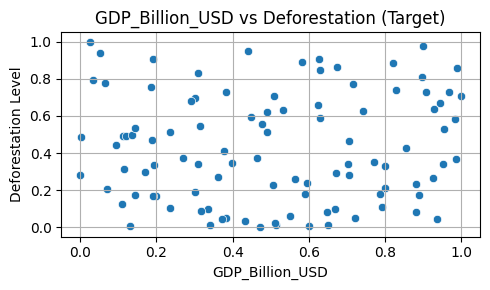

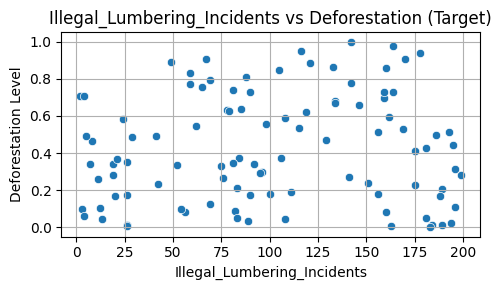

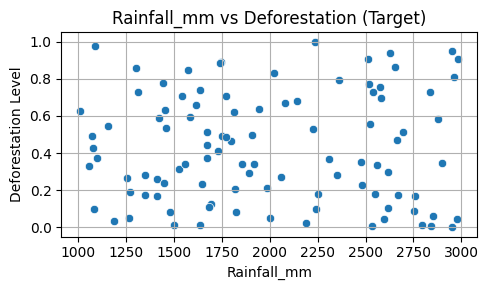

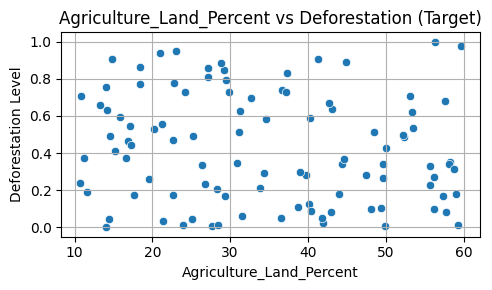

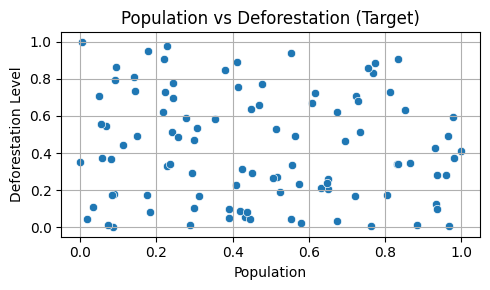

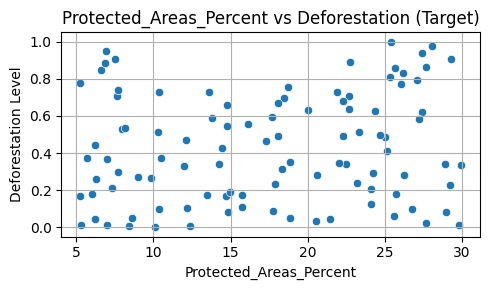

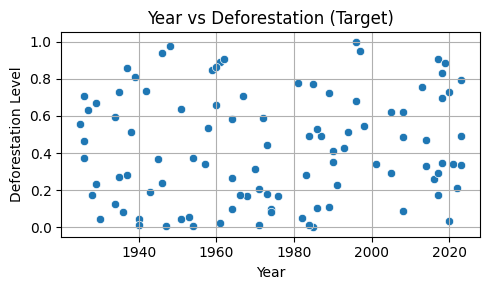

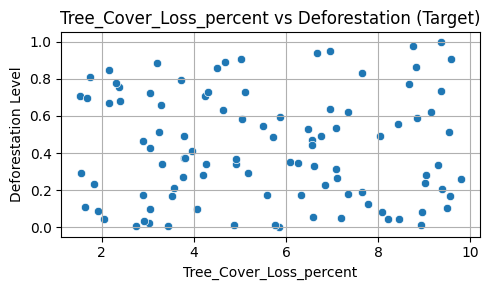

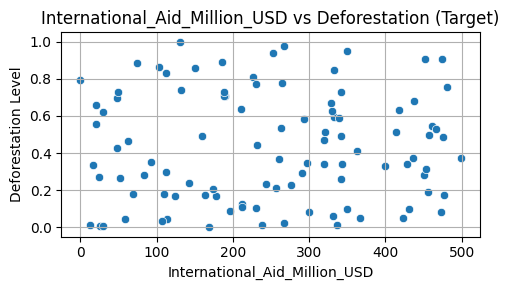

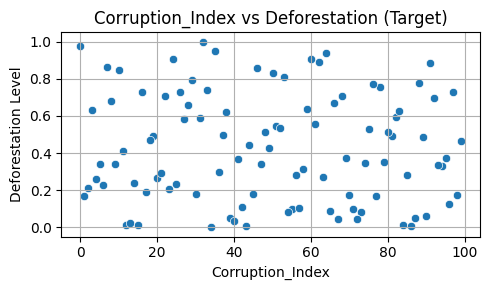

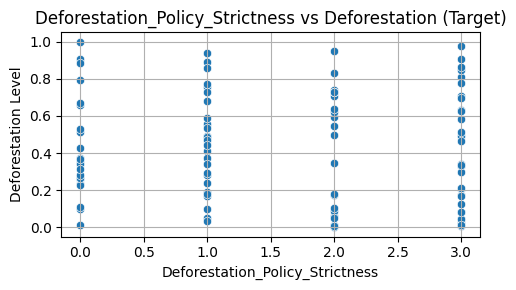

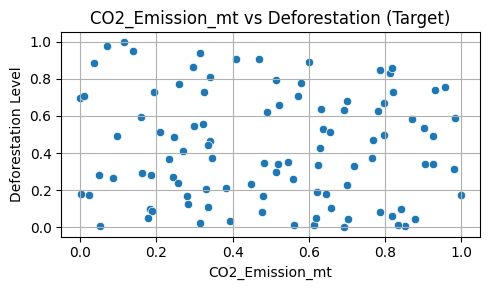

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
important_cols = [
    'GDP_Billion_USD', 'Illegal_Lumbering_Incidents', 'Rainfall_mm',
    'Agriculture_Land_Percent', 'Population', 'Protected_Areas_Percent',
    'Year', 'Tree_Cover_Loss_percent', 'International_Aid_Million_USD',
    'Corruption_Index', 'Deforestation_Policy_Strictness', 'CO2_Emission_mt'
]

for col in important_cols:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=df[col], y=df['Forest_Loss_Area_km2'])
    plt.title(f"{col} vs Deforestation (Target)")
    plt.xlabel(col)
    plt.ylabel("Deforestation Level")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_11376\3604420839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_series.values, y=correlation_series.index, palette='viridis')


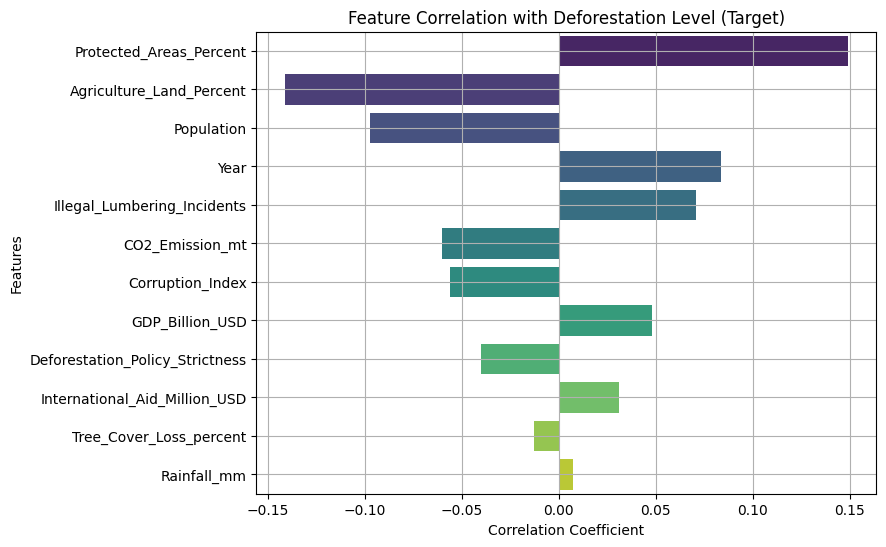

In [24]:
correlation_series = df[important_cols + ['Forest_Loss_Area_km2']].corr()['Forest_Loss_Area_km2'].drop('Forest_Loss_Area_km2')
correlation_series = correlation_series.sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_series.values, y=correlation_series.index, palette='viridis')
plt.title("Feature Correlation with Deforestation Level (Target)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.show()

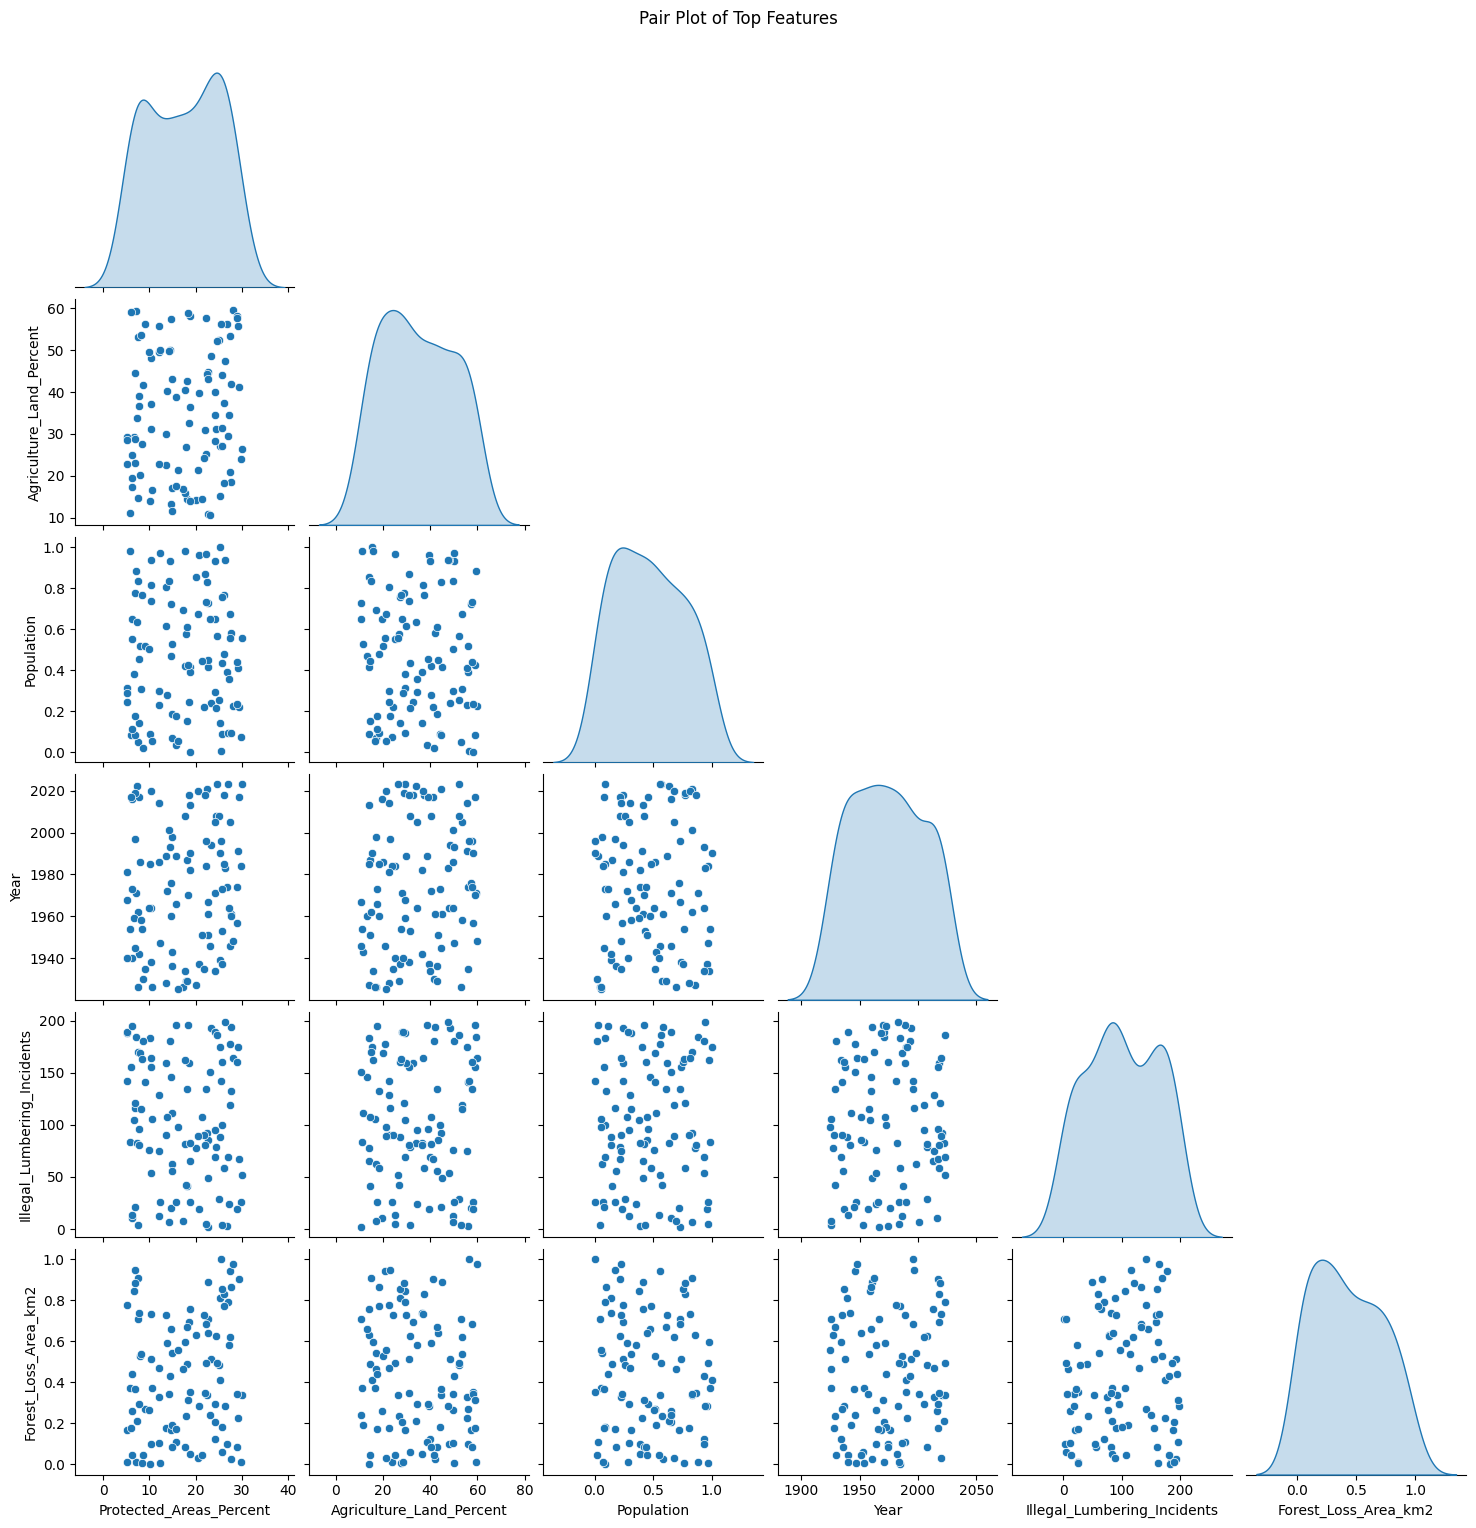

<Figure size 200x200 with 0 Axes>

In [25]:
top_features = correlation_series.head(5).index.tolist()

sns.pairplot(df[top_features + ['Forest_Loss_Area_km2']], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Top Features", y=1.02)
plt.figure(figsize=(2, 2))
plt.show()